In [1]:
!pip install tensorflow tensorflow-gpu matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ZainRazaHamid\AppData\Local\Temp\pip-install-m7fhrvue\tensorflow-gpu_af16a244a40f4af6bf19aec9eaf9a394\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu

In [2]:
!pip list

Package                           Version
--------------------------------- -----------
absl-py                           1.3.0
altgraph                          0.17.2
anyio                             3.6.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
asttokens                         2.0.8
astunparse                        1.6.3
async-generator                   1.10
attrs                             22.1.0
Babel                             2.10.3
backcall                          0.2.0
bcrypt                            4.0.0
beautifulsoup4                    4.11.1
bleach                            5.0.1
cachetools                        5.2.0
certifi                           2022.12.7
cffi                              1.15.1
charset-normalizer                2.1.1
chromedriver-autoinstaller        0.4.0
colorama                          0.4.5
cryptography                      38.0.1
csscompressor                     0.9.5
cycler               


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [5]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 466 files belonging to 2 classes.


In [16]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
data_iterator

In [27]:
batch = data_iterator.next()

In [28]:
len(batch)

2

In [29]:
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[1]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

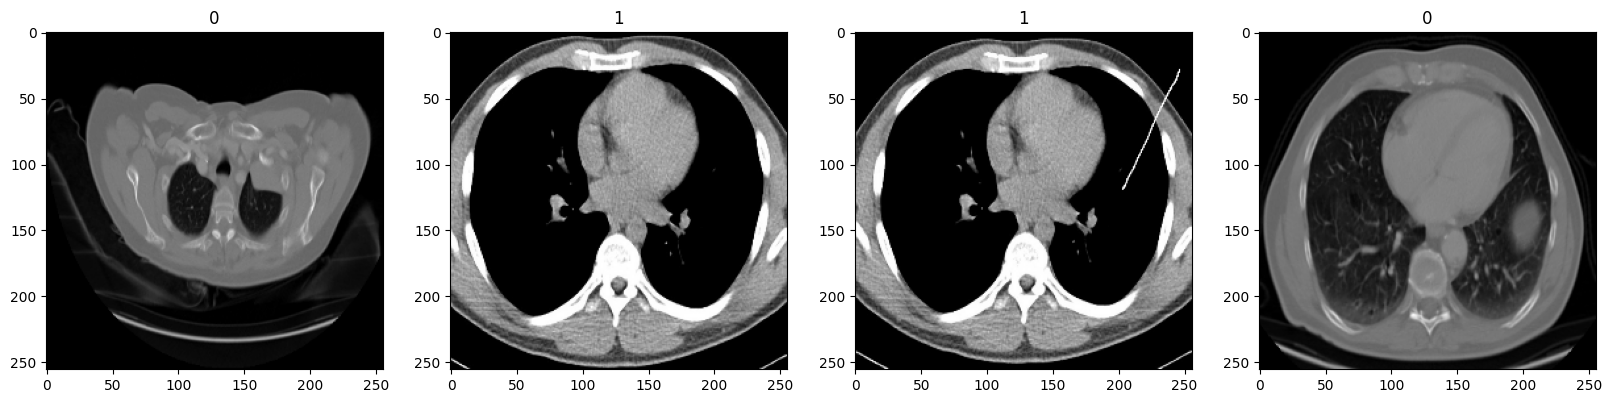

In [31]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
#Preprocessing

In [33]:
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [34]:
scaled_iterator = data.as_numpy_iterator()

In [35]:
batch = scaled_iterator.next()

In [36]:
batch[0].max()

1.0

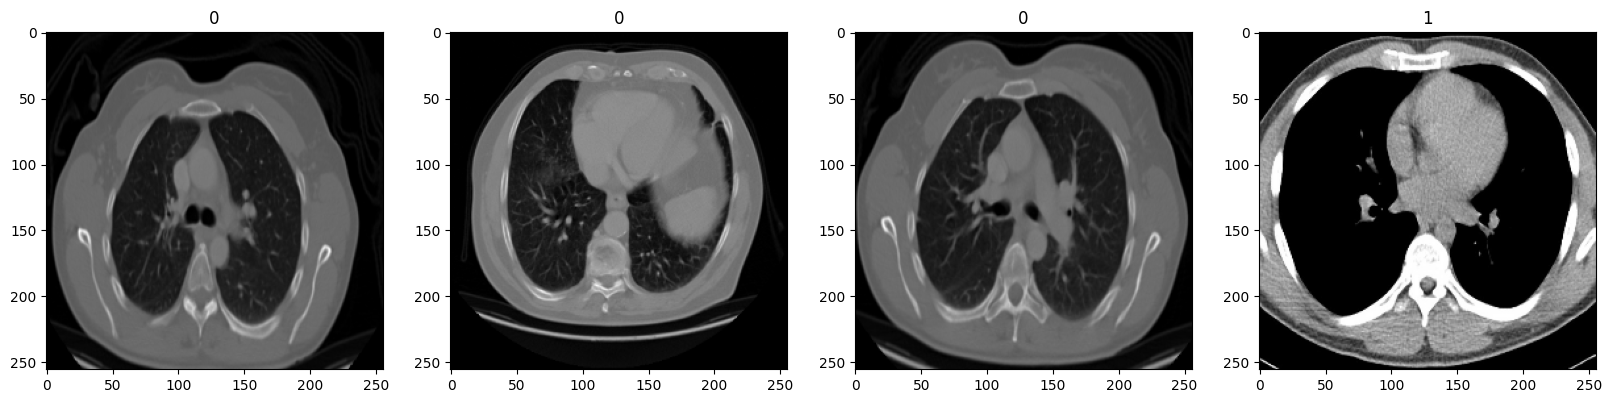

In [37]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [38]:
#split

In [39]:
len(data)

15

In [44]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.2)+1
val_size = int(len(data)*.1)

In [45]:
train_size

10

In [46]:
test_size

4

In [47]:
val_size

1

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [49]:
#Model


In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()

In [63]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [64]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [66]:
#Train

In [67]:
logdir = 'logs'

In [68]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 12s 883ms/step - loss: 0.5055 - accuracy: 0.7906 - val_loss: 0.1201 - val_accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - 9s 852ms/step - loss: 0.1703 - accuracy: 0.9406 - val_loss: 0.1014 - val_accuracy: 0.9688
Epoch 3/20
10/10 [==============================] - 9s 857ms/step - loss: 0.1287 - accuracy: 0.9625 - val_loss: 0.0661 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 11s 980ms/step - loss: 0.0526 - accuracy: 0.9875 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 11s 1s/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0269 - val_accuracy: 0.9688
Epoch 6/20
10/10 [==============================] - 11s 1s/step - loss: 0.0128 - accuracy: 0.9969 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 10s 949ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 8

In [70]:
#performance

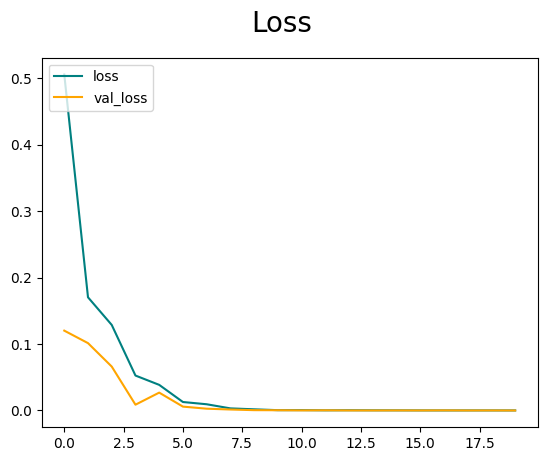

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

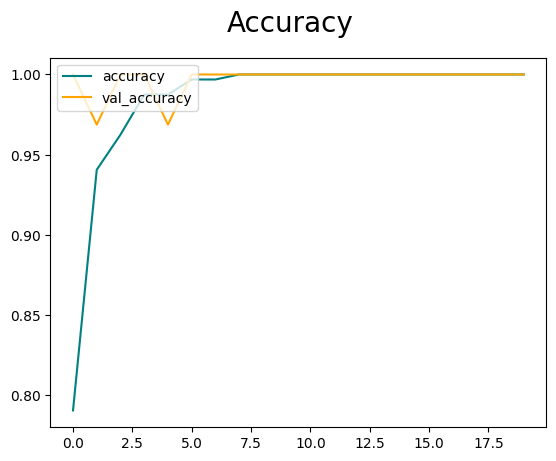

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [73]:
#Evaluation

In [74]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [76]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 222ms/step


In [79]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accurancy:  {acc.result().numpy()}')


Precision:1.0, Recall: 1.0, Accurancy:  1.0


In [80]:
import cv2

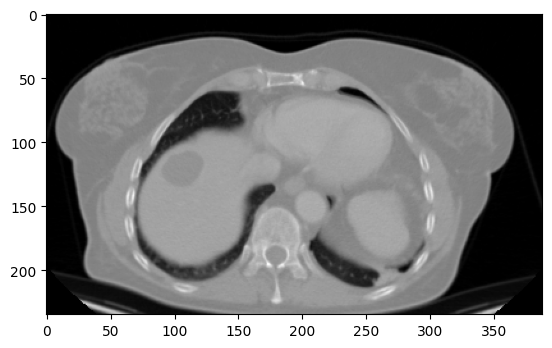

In [85]:
img = cv2.imread('test2.png')
plt.imshow(img)
plt.show()

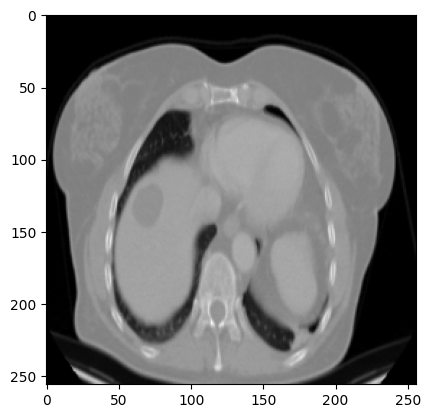

In [86]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 47ms/step


In [88]:
if yhat > 0.5: 
    print(f'Predicted class is Normal')
else:
    print(f'Predicted class is Cancer')

Predicted class is Cancer
